1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

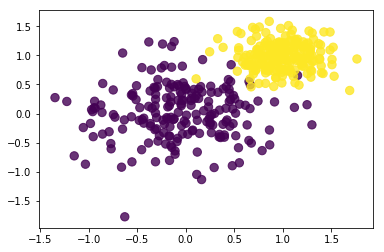

In [2]:
from IPython.display import Image
Image('data/two_categories_scatter_plot.png')

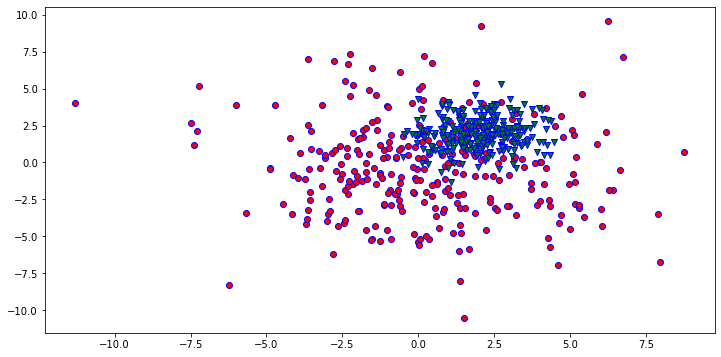

In [62]:
import numpy as np
import matplotlib.pyplot as plt

def create_2Dgaussian(mu1, mu2, sigma1, sigma2, size):
    x1 = np.random.normal(loc=mu1, scale=sigma1, size=size)
    y1 = np.random.normal(loc=mu1, scale=sigma1, size=size)
    x2 = np.random.normal(loc=mu2, scale=sigma2, size=size)
    y2 = np.random.normal(loc=mu2, scale=sigma2, size=size)
    return ((x1, y1),(x2, y2))
dataset = create_2Dgaussian(0, 2, 3, 1, 300)

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(dataset[0][0], dataset[0][1], marker='o', c='r', edgecolor='b')
ax.scatter(dataset[1][0], dataset[1][1], marker='v', c='g', edgecolor='b')

2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot


######## Loaded dataframe: ########
        residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
2      -7.200000        3.4
3      -4.150000        8.4
4      -6.590000        1.7
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[11131 rows x 2 columns]

######## Cleaned dataframe: ########
        residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
8      -0.042857        3.3
9       0.128571        5.3
10      0.085714       15.0
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[10489 rows x 2 columns]


Text(0, 0.5, 'Residuals')

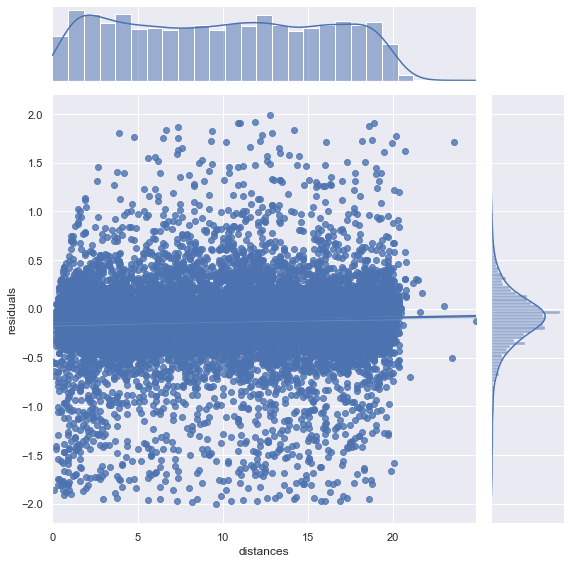

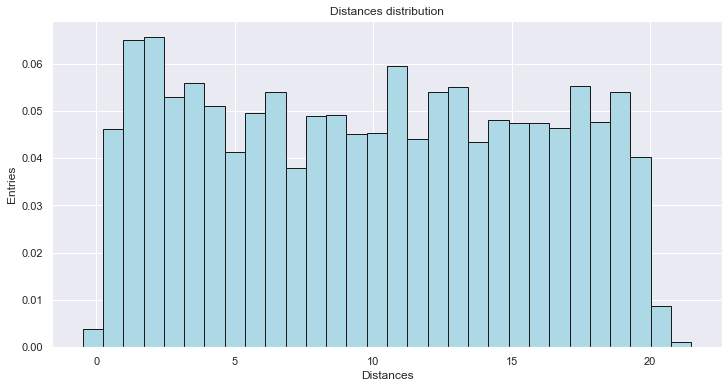

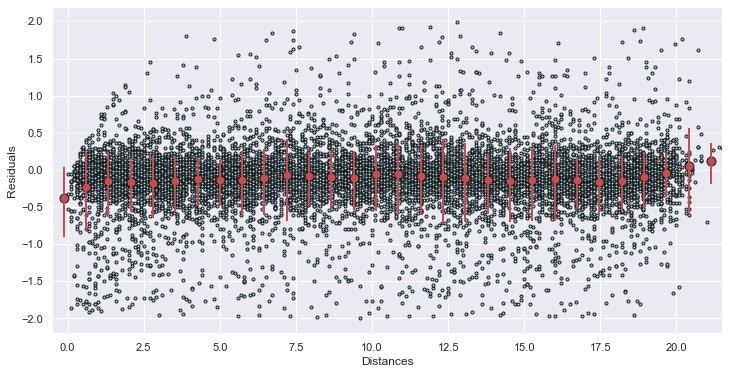

In [96]:
import pickle
import pandas as pd
import numpy as np
from matplotlib import collections  as mc


#Inspect the dataset
with open('data/residuals_261.pkl', 'rb') as f:
    data = pickle.load(f)


#Convert the content to a Pandas Dataframe
mydict = data[()]
df = pd.DataFrame(mydict)
print("\n######## Loaded dataframe: ########\n", df)

#Clean the sample
clean_df = df[abs(df['residuals'])<2]
print("\n######## Cleaned dataframe: ########\n", clean_df)

#Plot with seaborn
import seaborn as sns
g = sns.jointplot(x="distances", y="residuals", data=clean_df, kind='reg', height = 8)


#Profile histogram for the "distance" variable
dist = list(clean_df['distances'])
fig, ax = plt.subplots(figsize=(12, 6))
h, bins, _ = plt.hist(dist, bins=30, range=(-0.5, 21.5), density=True, facecolor='lightblue', edgecolor = "k",cumulative=False)
ax.set_title('Distances distribution')
ax.set_xlabel('Distances')
ax.set_ylabel('Entries')
bin_ranges = list(zip(bins,bins[1:]))

#Computing centers of bins
centers = [x[1]-(x[1]-x[0])/2 for x in bin_ranges]

#Computing means and variances of residuals in each bin
means = np.empty(len(bin_ranges))
variances = np.empty(len(bin_ranges))
for bin_index, interval in enumerate(bin_ranges):
    residuals=[]
    for index, row in clean_df.iterrows():
        if (interval[0]<row['distances']) and (row['distances']<interval[1]):
            residuals.append(row['residuals'])
    if len(residuals)==0:
        np.append(means, np.nan)
        np.append(variances, np.nan)
    else:
        means[bin_index] = sum(residuals)/len(residuals)
        variances[bin_index] = np.var(residuals)

#Plot the dataframe points with means and variances
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(clean_df['distances'], clean_df['residuals'], marker='.', c='lightblue', edgecolor='k')
ax.scatter(centers, means, marker='o', c='r', edgecolor='k', s=80)

lines = [[(x[0], x[1]-2.5*x[2]), (x[0], x[1]+2*x[2])] for x in zip(centers,means, variances)]
lc = mc.LineCollection(lines, colors='r', linewidths=2)
ax.add_collection(lc)
plt.gca().set_xlim(left=-0.5, right=21.5)
ax.set_xlabel('Distances')
ax.set_ylabel('Residuals')


3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


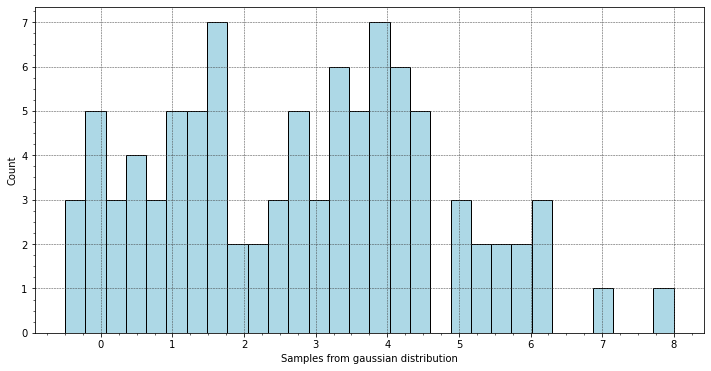

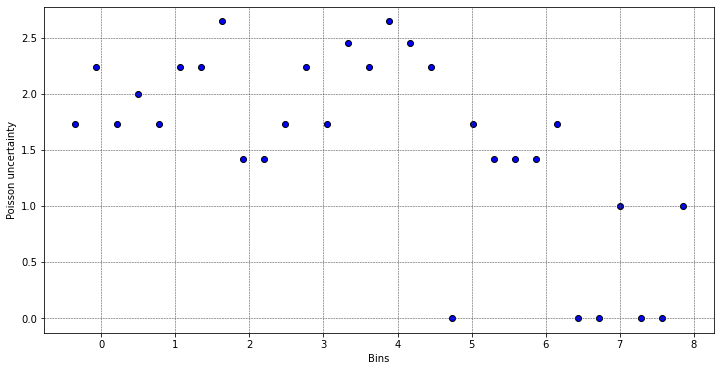

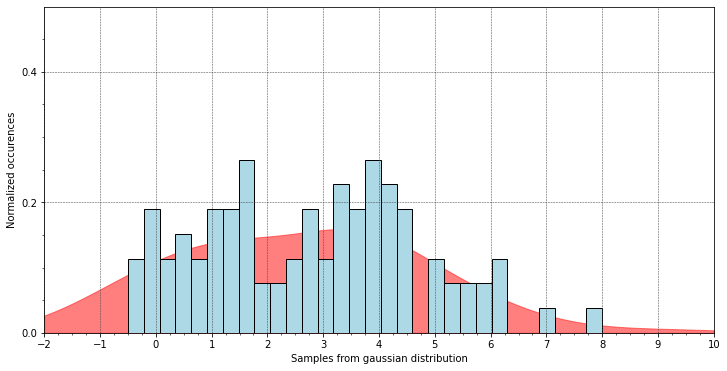

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import trapz
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

x = np.random.normal(loc=3, scale=2, size=100)

#Firstly plot the hist without normalization
fig, ax = plt.subplots(figsize=(12, 6))
ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)
ax.set_xlabel("Samples from gaussian distribution")
ax.set_ylabel("Count")
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator(4))

h, bins, _ = plt.hist(x, bins=30, range=(-0.5, 8), density=False, cumulative=False, facecolor='lightblue', edgecolor = "k")


#Plot the Poisson uncertainties 
centers = [(x[0]+x[1])/2 for x in list(zip(bins,bins[1:]))]
fig2, ax2 = plt.subplots(figsize=(12, 6))
ax2.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)
ax2.set_xlabel("Bins")
ax2.set_ylabel("Poisson uncertainty")
ax2.scatter(centers, np.sqrt(h), marker='o', c='blue', edgecolor='k')
ax2.xaxis.set_major_locator(MultipleLocator(1))

#Plot the KDE together with the normalized histogram

fig3, ax3 = plt.subplots(figsize=(12, 6))
ax3.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)
ax3.set_xlabel("Samples from gaussian distribution")
ax3.set_ylabel("Normalized occurences")
ax3.xaxis.set_major_locator(MultipleLocator(1))
ax3.xaxis.set_minor_locator(AutoMinorLocator(4))
ax3.yaxis.set_major_locator(MultipleLocator(0.2))
ax3.yaxis.set_minor_locator(AutoMinorLocator(4))
ax3.axis([-2, 10, 0, 0.5])
h_norm, bins, _ = plt.hist(x, bins=30, range=(-0.5, 8), density=True, cumulative=False, facecolor='lightblue', edgecolor = "k")

x_d = np.linspace(-2, 10, 100)
gaussians = [norm(xi).pdf(x_d) for xi in x]
gaussians_sum = sum(gaussians)
density = gaussians_sum / np.trapz(gaussians_sum, x_d)
ax3.fill_between(x_d, density, alpha=0.5, color='r')


